In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import itertools

n = 100
vmin = 10.75 if n == 50 else 16
vmax = 11 if n == 50 else 16.5
path = f"../res/stats/n{n}/"

destroy = ["point", "tour", "neural"]
repair = ["scip", "greedy", "neural"]

## NLNS

In [2]:
nlns = {}
for d in destroy:
    for r in repair:
        key = f"destroy_{d}_repair_{r}"
        nlns[key] = pd.read_csv(path + f"{key}_n{n}.csv", index_col=0)
        nlns[key]["destroy"] = d
        nlns[key]["repair"] = r

dfs = list(nlns.values())
stats = pd.concat(dfs)

mean_stats = stats.groupby(["destroy", "repair"]).mean()
mean_stats.reset_index(inplace=True)
mean_stats = mean_stats[["destroy", "repair", "cost"]]
mean_stats = mean_stats.replace("scip", "exact")
mean_stats

,destroy,repair,cost
0,neural,greedy,16.237503
1,neural,neural,16.035981
2,neural,exact,16.424531
3,point,greedy,16.097022
4,point,neural,15.969997
5,point,exact,16.523238
6,tour,greedy,16.260567
7,tour,neural,16.112183
8,tour,exact,16.532629


In [3]:
data = mean_stats.pivot("repair", "destroy", "cost")
data = data[destroy]
data = data.reindex(["neural", "greedy", "exact"])
data

destroy,point,tour,neural
repair,,,
neural,15.969997,16.112183,16.035981
greedy,16.097022,16.260567,16.237503
exact,16.523238,16.532629,16.424531


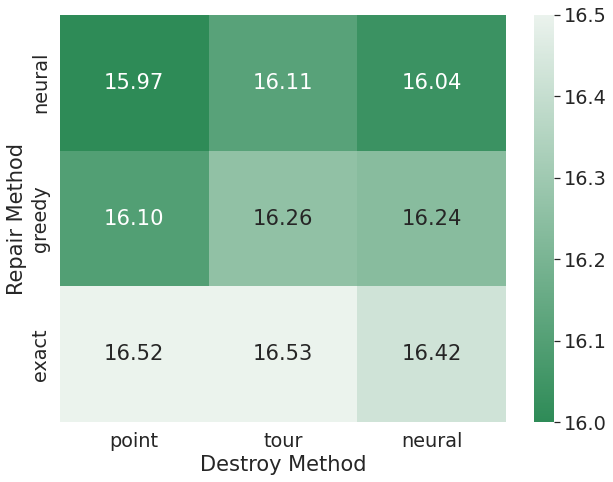

In [4]:
sns.set(font_scale=1.75)
plt.figure(figsize=(10, 7.5))
cmap = sns.light_palette("seagreen", as_cmap=True).reversed()
cbar_kws={'label': 'Mean Cost', 'orientation': 'vertical'}
ax = sns.heatmap(data, annot=True, fmt=".2f", vmin=vmin, vmax=vmax, cmap=cmap)
plt.xlabel('Destroy Method')
plt.ylabel('Repair Method')
plt.show()

## ANLNS

In [5]:
anlns = {}
for d in destroy:
    key = f"destroy_{d}_repair_{repair[-1]}"
    anlns[key] = pd.read_csv(path + f"{key}_n{n}.csv", index_col=0)
    anlns[key]["destroy1"] = d
    anlns[key]["destroy2"] = d
for d1, d2 in itertools.combinations(destroy, 2):
    key = f"destroy_{d1}+{d2}_repair_{repair[-1]}"
    anlns[key] = pd.read_csv(path + f"{key}_n{n}.csv", index_col=0)
    anlns[key]["destroy1"] = d1
    anlns[key]["destroy2"] = d2

dfs = list(anlns.values())
stats = pd.concat(dfs)

mean_stats = stats.groupby(["destroy1", "destroy2"]).mean()
mean_stats.reset_index(inplace=True)
mean_stats = mean_stats[["destroy1", "destroy2", "cost"]]
mean_stats

,destroy1,destroy2,cost
0,neural,neural,16.035981
1,point,neural,15.933830
2,point,point,15.969997
3,point,tour,16.031496
4,tour,neural,16.052258
5,tour,tour,16.112183


In [6]:
data = mean_stats.pivot("destroy2", "destroy1", "cost")
data = data[destroy]
data = data.reindex(destroy)
data

destroy1,point,tour,neural
destroy2,,,
point,15.969997,NaN,NaN
tour,16.031496,16.112183,NaN
neural,15.933830,16.052258,16.035981


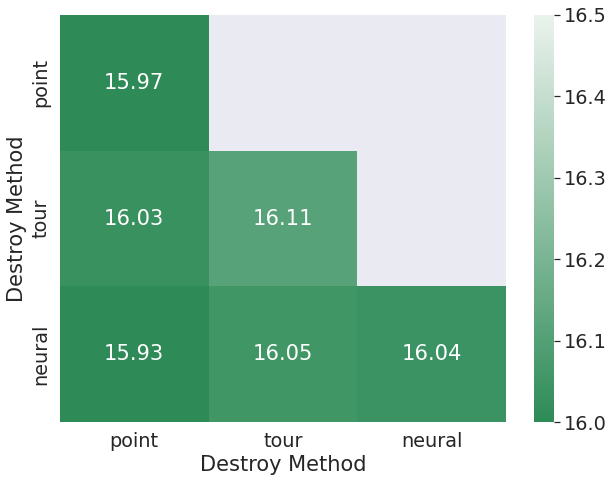

In [7]:
plt.figure(figsize=(10, 7.5))
cmap = sns.light_palette("seagreen", as_cmap=True).reversed()
ax = sns.heatmap(data, annot=True, fmt=".2f", vmin=vmin, vmax=vmax, cmap=cmap)
plt.xlabel('Destroy Method')
plt.ylabel('Destroy Method')
plt.show()